In [1]:
from nanodrivers.visa_drivers.vna import VNA, get_class_attributes

import pyvisa

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

#plotting
import matplotlib.pyplot as plt
import matplotlib

#matlab import
import scipy.io
from scipy.io import savemat

#file_store
import os
import copy

#time
from datetime import datetime, timedelta
import time

from ctypes import *
%matplotlib inline

    
def db2pow(db):
    return 10*np.log10(db)

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
vna = VNA('TCPIP0::169.254.36.111::inst0::INSTR')
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [3]:
vna.get_instance_attributes()

{'device': <'TCPIPInstrument'('TCPIP0::169.254.36.111::inst0::INSTR')>,
 'type': 'LIN',
 'form': 0,
 'cent_freq': None,
 'span': None,
 'star_freq': None,
 'stop_freq': None,
 'cw_freq': None,
 'status': None,
 'nop': 1001,
 'band': 10.0,
 'power': 10.0}

In [6]:
vna.get_sweep_type()

'CW'

In [5]:
vna.set_cw()

'CW'

# line 1 + line 2

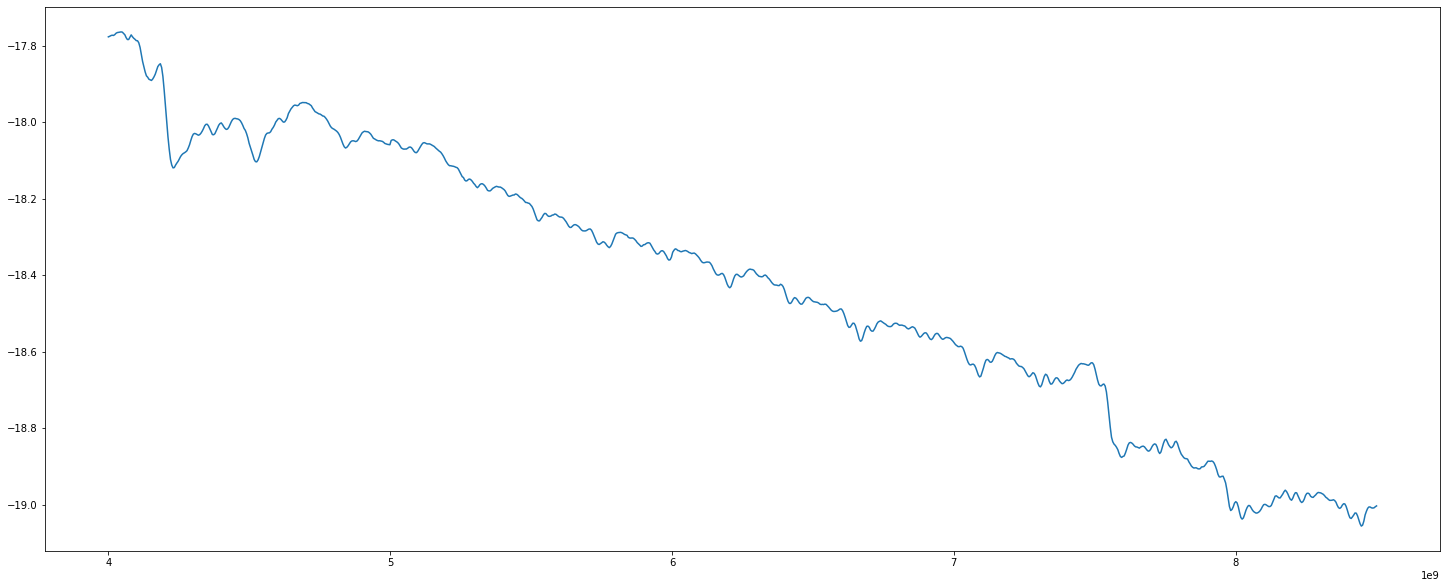

In [7]:
mag_line12, pha_line12 = vna.get_data()
freq = vna.get_freq()
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(freq, mag_line12)

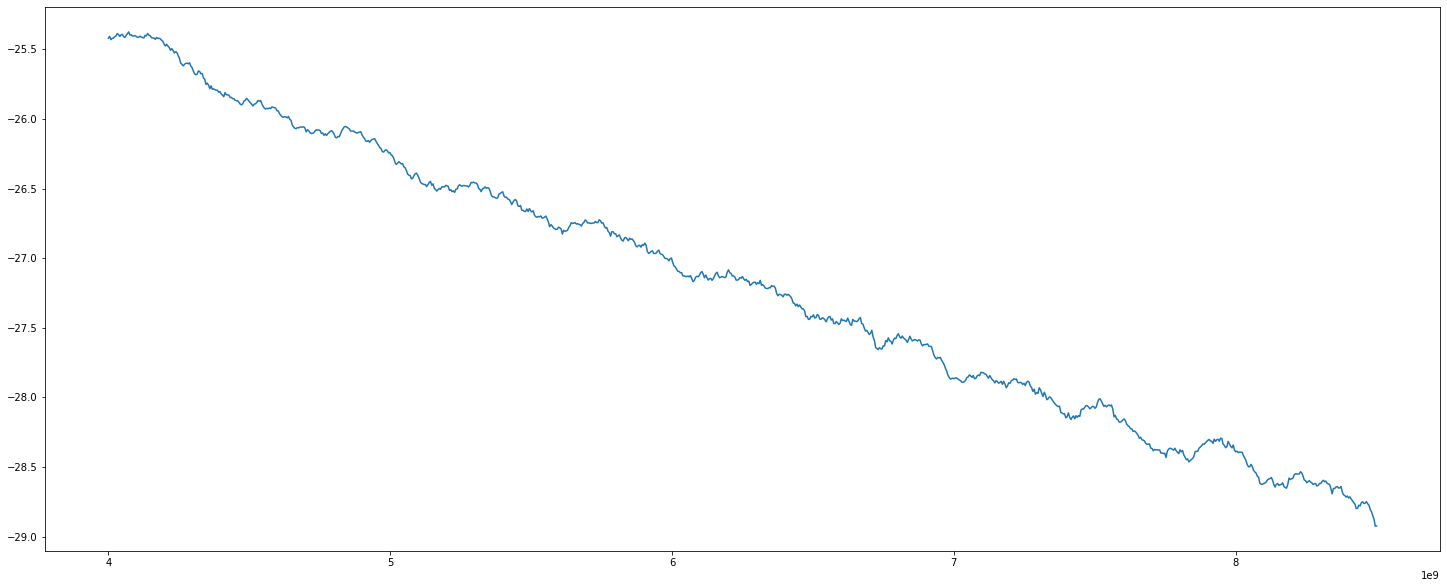

In [10]:
mag_2, pha_2 = vna.get_data()
freq = vna.get_freq()
fig, ax = plt.subplots(figsize=(25,10))
ax.plot(freq, mag_2-mag_line12+15)

In [15]:
now = datetime.now()
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\Cryostat info\Lines'
file = r'Calibration_all_lines_'+ now.strftime(r'%d-%m-%Y') + '.mat'
file_name = folder +'\\' + file


In [16]:
state=dict()
state['Ref_mag'] = mag_line12
state['Ref_pha'] = pha_line12
state['L2_mag'] = mag_2
state['L2_pha'] = pha_2
savemat(file_name, state)